In [1689]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error

In [1690]:
df = pd.read_csv('pl_22_23.csv', encoding='utf-8')
df_22 = pd.read_csv('pl_23_24.csv', encoding='utf-8')
df_22_24 = pd.concat([df, df_22], ignore_index=True)

In [1691]:
df.head(2)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,1.76,0.50,2.09,1.84,2.04,1.88,2.09,1.88,2.03,1.85
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,2.73,1.75,1.90,2.03,1.91,2.02,2.01,2.06,1.89,1.99


In [1692]:
df_22.head(2)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,11/08/2023,20:00,Burnley,Man City,0,3,A,0,2,...,2.28,1.5,1.95,1.98,1.95,1.97,NaN,NaN,1.92,1.95
1,E0,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,2.63,-2.0,1.95,1.98,1.93,1.97,2.01,2.09,1.95,1.92


In [1693]:
df_22_24

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,1.76,0.50,2.09,1.84,2.04,1.88,2.09,1.88,2.03,1.85
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,2.73,1.75,1.90,2.03,1.91,2.02,2.01,2.06,1.89,1.99
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,1.76,0.50,1.93,2.00,1.93,2.00,1.94,2.04,1.88,2.00
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,...,1.87,-0.25,2.08,1.85,2.10,1.84,2.14,1.87,2.08,1.81
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,0,0,...,1.89,-1.00,1.97,1.96,1.99,1.93,2.19,1.97,2.03,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,E0,30/12/2023,17:30,Nott'm Forest,Man United,2,1,H,0,0,...,2.14,0.25,1.99,1.94,2.00,1.93,2.09,1.94,1.97,1.89
574,E0,31/12/2023,14:00,Fulham,Arsenal,2,1,H,1,1,...,2.04,1.00,1.89,2.04,1.87,2.06,2.02,2.07,1.89,1.98
575,E0,31/12/2023,14:00,Tottenham,Bournemouth,3,1,H,1,0,...,3.41,-0.75,1.98,1.95,2.00,1.93,2.00,2.00,1.93,1.93
576,E0,01/01/2024,20:00,Liverpool,Newcastle,4,2,H,0,0,...,3.12,-1.50,2.01,1.92,1.98,1.93,2.14,1.94,2.01,1.87


In [1694]:
df_22_24['HomeTeam'].value_counts()

HomeTeam
Crystal Palace      29
Aston Villa         29
Liverpool           29
Chelsea             29
Nott'm Forest       29
Brentford           29
Wolves              29
Brighton            29
Fulham              29
Arsenal             29
West Ham            29
Man United          29
Everton             29
Tottenham           29
Newcastle           29
Man City            28
Bournemouth         28
Leicester           19
Southampton         19
Leeds               19
Burnley             10
Sheffield United    10
Luton               10
Name: count, dtype: int64

In [1695]:
df_22_24.shape

(578, 106)

In [1696]:
df_22_24.dtypes

Div          object
Date         object
Time         object
HomeTeam     object
AwayTeam     object
             ...   
PCAHA       float64
MaxCAHH     float64
MaxCAHA     float64
AvgCAHH     float64
AvgCAHA     float64
Length: 106, dtype: object

In [1697]:
df_22_24.Date = pd.to_datetime(df_22_24['Date'], dayfirst=True)
df_22_24.Date.head(2)

0   2022-08-05
1   2022-08-06
Name: Date, dtype: datetime64[ns]

In [1698]:
df_22_24['Day_code'] = df_22_24['Date'].dt.dayofweek
df_22_24.Day_code.head(2)

0    4
1    5
Name: Day_code, dtype: int32

In [1699]:
df_22_24['Time_code'] = df_22_24['Time'].apply(lambda x: x[:2]).astype('int64')
df_22_24.Time_code.head(2)

0    20
1    12
Name: Time_code, dtype: int64

In [1700]:
encoder = LabelEncoder()
df_22_24['H_Team_code'] = encoder.fit_transform(df_22_24.HomeTeam)
df_22_24['A_Team_code'] = encoder.fit_transform(df_22_24.AwayTeam)
#df_22_24[['HomeTeam','H_Team_code']].sort_values('H_Team_code', ascending=False)

In [1701]:
df_22_24[['HomeTeam','H_Team_code']].groupby(['HomeTeam','H_Team_code']).count()

,
HomeTeam,H_Team_code
Arsenal,0
Aston Villa,1
Bournemouth,2
Brentford,3
Brighton,4
Burnley,5
Chelsea,6
Crystal Palace,7
Everton,8


In [1702]:
df_22_24['Win'] = np.where(df_22_24.FTR == 'H', 1, 0)
df_22_24.Win.head(2)

0    0
1    0
Name: Win, dtype: int32

In [1703]:
df_22_24['Goals'] = df_22_24.FTHG + df_22_24.FTAG
df_22_24.Goals.unique()

array([2, 4, 3, 5, 1, 6, 0, 9, 7, 8], dtype=int64)

`Making some predictors and the the outcome we would like to predict`

In [1704]:
features = ['Day_code', 'Time_code', 'H_Team_code', 'A_Team_code', 'Win']

In [1705]:
df_22_24[features]

,Day_code,Time_code,H_Team_code,A_Team_code,Win
0,4,20,7,0,0
1,5,12,9,12,0
2,5,15,2,1,1
3,5,15,10,22,1
4,5,15,16,17,1
...,...,...,...,...,...
573,5,17,17,15,1
574,6,14,9,0,1
575,6,14,20,2,1
576,0,20,12,16,1


In [1706]:
target = 'Win'
X = df_22_24[features].drop(target, axis=1)
y = df_22_24[target]

`Adding new observations to the dataframe and the real results of them`

In [1707]:
#X.loc[len(X.index)] = [1, 21, 10, 8]
#y.loc[len(X.index)] = 1

In [1708]:
#X.loc[578], y.iloc[578]

In [1709]:
X = np.array(X)
y = np.array(y)

In [1710]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [1711]:
#X_train.head(2)

In [1712]:
#y_train

In [1713]:
scaler = StandardScaler()
scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=15)
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
y_pred = model_log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy is {accuracy:.2f}')

Accuracy is 0.56


In [1714]:
threshold = 0.5
y_pred_proba = model_log.predict_proba(X_test)[:, 1]
y_pred = np.where(y_pred_proba > threshold, 1, 0)
y_test = np.array(y_test)
y_test[:5], y_pred[:5]

(array([0, 0, 1, 1, 0]), array([0, 0, 0, 1, 0]))

In [1715]:
true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0

for i in range(len(y_test)):
  if y_test[i] == 1 and y_pred[i] == 1:
    true_positives += 1
  elif y_test[i] == 0 and y_pred[i] == 0:
    true_negatives += 1
  elif y_test[i] == 0 and y_pred[i] == 1:
    false_positives += 1
  else:
    false_negatives +=1
    
print(true_positives, true_negatives, false_positives, false_negatives)
print(confusion_matrix(y_test, y_pred))
print((true_positives+true_negatives)/(true_negatives+true_positives+false_negatives+false_positives))

21 44 13 38
[[44 13]
 [38 21]]
0.5603448275862069


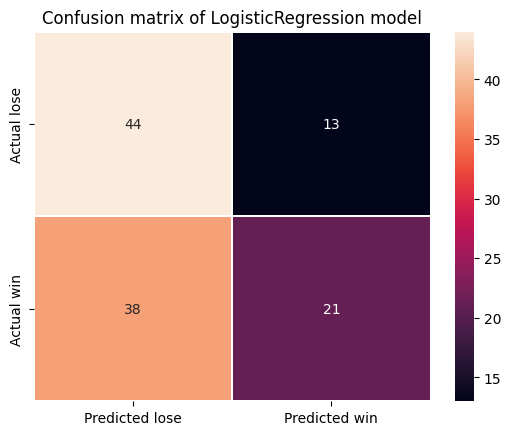

<Figure size 640x480 with 0 Axes>

In [1716]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            linecolor='white',
            linewidths=.1,
            xticklabels=['Predicted lose', 'Predicted win'],
            yticklabels=['Actual lose', 'Actual win'])
plt.title('Confusion matrix of LogisticRegression model')
plt.show()
plt.clf()

In [1717]:
np.random.seed(42)
accuracy_train=[]
accuracy_test = []
depths = range(1,20)
for depth in depths:
  model = RandomForestClassifier(max_depth=depth)
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  accuracy_train.append(accuracy_score(y_train, y_pred_train))
  accuracy_test.append(accuracy_score(y_test, y_pred_test))
best_acc = np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print(f'Best accuracy with using Randomforest is: {best_acc:.3f} and the best depth is: ', best_depth)

Best accuracy with using Randomforest is: 0.647 and the best depth is:  3


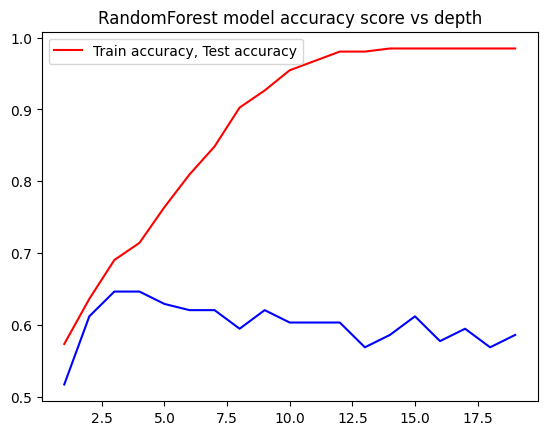

In [1718]:
plt.plot(depths, accuracy_train, 'r', depths, accuracy_test, 'b')
plt.title('RandomForest model accuracy score vs depth')
plt.legend(['Train accuracy, Test accuracy'])
plt.show()

In [1719]:
model = RandomForestClassifier(max_depth=3, n_estimators=120)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'{accuracy_score(y_test, y_pred):.3f}')

0.655


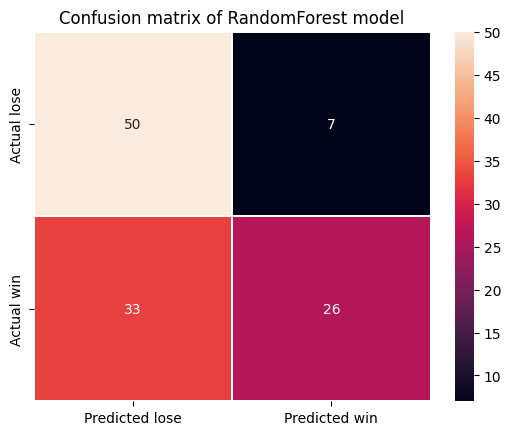

<Figure size 640x480 with 0 Axes>

In [1720]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            linecolor='white',
            linewidths=.1,
            xticklabels=['Predicted lose', 'Predicted win'],
            yticklabels=['Actual lose', 'Actual win'])
plt.title('Confusion matrix of RandomForest model')
plt.show()
plt.clf()

`Predicting the number of Goals full time`

In [1721]:
linear_model = LinearRegression()

In [1722]:
new_features = features[:-1]

In [1723]:
new_features.extend(['Goals'])
new_features

['Day_code', 'Time_code', 'H_Team_code', 'A_Team_code', 'Goals']

In [1724]:
target = 'Goals'
X = np.array(df_22_24[new_features].drop(target, axis=1))
y = np.array(df_22_24[target])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20)
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

In [1725]:
X[:5], y[:5]

(array([[ 4, 20,  7,  0],
        [ 5, 12,  9, 12],
        [ 5, 15,  2,  1],
        [ 5, 15, 10, 22],
        [ 5, 15, 16, 17]], dtype=int64),
 array([2, 4, 2, 3, 2], dtype=int64))

In [1726]:
print(f'Mean absoulute error: {mean_absolute_error(y_test, y_pred)}')

Mean absoulute error: 1.4340533385766896


In [1727]:
teams = df_22_24[['HomeTeam','H_Team_code']].groupby(['HomeTeam','H_Team_code']).count().reset_index()
teams

,HomeTeam,H_Team_code
0,Arsenal,0
1,Aston Villa,1
2,Bournemouth,2
3,Brentford,3
4,Brighton,4
5,Burnley,5
6,Chelsea,6
7,Crystal Palace,7
8,Everton,8
9,Fulham,9


In [1728]:
teams.H_Team_code[teams.HomeTeam == 'Newcastle'].values[0]

16

In [1729]:
def decoder(team: str) -> int:
    return teams.H_Team_code[teams.HomeTeam == team].values[0]

In [1730]:
#Tuesday, 7 pm, Nott vs Arsenal
test_1 = np.array([[1, 19, decoder("Nott'm Forest"), decoder("Arsenal")]])
print(test_1)
print(model.predict(test_1), linear_model.predict(test_1))

[[ 1 19 17  0]]
[0] [2.61174734]


In [1731]:
#Tuesday, 7 pm, Luton vs Brighton
test_2 = np.array([1, 19, decoder("Luton"), decoder("Brighton")]).reshape(1, -1)
print(test_2)
model.predict(test_2)

[[ 1 19 13  4]]


array([1])

In [1732]:
#Tuesday, 7 pm, Fulham vs Everton
test_3 = np.array([1, 19, decoder("Fulham"), decoder("Everton")]).reshape(1, -1)
print(test_3)
model.predict(test_3)

[[ 1 19  9  8]]


array([0])

In [1733]:
#Tuesday, 8 pm, Crystal vs Sheffield
test_4 = np.array([1, 20, decoder("Crystal Palace"), decoder("Sheffield United")]).reshape(1, -1)
print(test_4)
model.predict(test_4)

[[ 1 20  7 18]]


array([0])

In [1734]:
#Tuesday, 8 pm, Aston Villa vs Newcastle
test_5 = np.array([1, 20, decoder("Aston Villa"), decoder("Newcastle")]).reshape(1, -1)
print(test_5)
model.predict(test_5)

[[ 1 20  1 16]]


array([0])

In [1735]:
#Wednesday, 7 pm, Man City vs Burnley
test_6 = np.array([2, 19, decoder("Man City"), decoder("Burnley")]).reshape(1, -1)
print(test_6)
model.predict(test_6)

[[ 2 19 14  5]]


array([1])

In [1736]:
#Wednesday, 7 pm, Tottenham vs Brentford
test_7 = np.array([2, 19, decoder("Tottenham"), decoder("Brentford")]).reshape(1, -1)
print(test_7)
model.predict(test_7)

[[ 2 19 20  3]]


array([0])

In [1737]:
#Wednesday, 8 pm, Liverpool vs Chelsea
test_8 = np.array([2, 20, decoder("Liverpool"), decoder("Chelsea")]).reshape(1, -1)
print(test_8)
model.predict(test_8)

[[ 2 20 12  6]]


array([1])

In [1738]:
def prediction(day: str, time: int, team_h: str, team_a: str) -> list:
    time -= 1
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    if day in days:
        day = days.index(day)
    result = model.predict(np.array([[day, time, decoder(team_h), decoder(team_a)]]))
    num_goals = linear_model.predict(np.array([[day, time, decoder(team_h), decoder(team_a)]]))
    return result, num_goals
prediction('Tuesday', 19, "Nott'm Forest", 'Arsenal')

(array([0]), array([2.63325426]))

In [1740]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day = input('Enter the day from when the match will be played: ')
time = int(input('Enter the time when the match will start: '))
team_h = input('Enter the name of the "Home Team": ')
team_a = input('Enter the name of the "Away Team": ')
if prediction(day, time, team_h, team_a)[0][0] == 0:
    print(f'{team_h} will DO NOT WIN meaning that the match will be DRAW OR LOSE.')
else:
    print(f'{team_h} will WIN.')
print(f'The expected number of goals are: {prediction(day, time, team_h, team_a)[1][0]:.2f}')

Liverpool will WIN.
The expected number of goals are: 2.76
